# Constituency Grammars in NLP

- Constituency Grammars in NLP are a set of grammatical rules that describe 
the hierarchical structure of a sentence by grouping words into meaningful 
phrases or constituents.
- These grammars define how smaller parts of a 
sentence combine to form larger units in a structured, tree-like representation. 
- Constituency grammars are widely used in natural language processing for 
tasks like parsing, syntax analysis, and semantic interpretation.


# Key Concepts in Constituency Grammars

1. **Constituents**:
    - Subunits of a sentence, such as words or phrases, that function as a single unit.
    - Examples of constituents include:
      - **Noun Phrase (NP)**: "The black cat"
      - **Verb Phrase (VP)**: "sat on the mat"
      - **Prepositional Phrase (PP)**: "on the mat"

2. **Phrase Structure Rules**:
    - Define how words and phrases combine to form valid sentences.
    - **Example rules**:
      - S -> NP VP: A sentence (S) consists of a noun phrase (NP) followed by a verb phrase (VP).
      - NP -> Det N: A noun phrase consists of a determiner (Det) followed by a noun (N).

3. **Parse Tree**:
    - A hierarchical tree representation of the sentence structure based on constituency grammar.
    - Example for "The black cat sat on the mat":

      (S
        (NP (Det The) (Adj black) (N cat))
        (VP (V sat)
            (PP (P on)
                (NP (Det the) (N mat)))))
---

# Types of Constituency Grammars

1. **Context-Free Grammar (CFG)**:
    - Each production rule has a single non-terminal on the left-hand side.
    - Widely used in NLP for constituency parsing.
    - Example:
      S -> NP VP
      NP -> Det N
      VP -> V NP
      Det -> 'the' | 'a'
      N -> 'cat' | 'dog'
      V -> 'saw' | 'chased'

2. **Probabilistic Context-Free Grammar (PCFG)**:
    - Extends CFG by assigning probabilities to each rule.
    - Useful for modeling the likelihood of different sentence structures.
    - Example:
      S -> NP VP [0.9]
      S -> VP [0.1]
---

# Applications of Constituency Grammars

1. **Syntactic Parsing**:
    - Breaks a sentence into its constituent parts and arranges them in a tree structure.

2. **Machine Translation**:
    - Helps in accurately translating phrases while preserving grammatical structure.

3. **Information Extraction**:
    - Extracts meaningful chunks, such as names or entities, based on syntactic structure.

4. **Question Answering**:
    - Identifies relevant parts of the question and the text to derive answers.
---

# Parsing Techniques in NLP: Top-Down and Bottom-Up Parsing

"""
Parsing is a crucial process in Natural Language Processing (NLP) where a sentence 
is analyzed to understand its grammatical structure. Two common parsing techniques are 
Top-Down Parsing and Bottom-Up Parsing.
"""

# 1. Top-Down Parsing

"""
- Starts with the root of the parse tree (the start symbol of the grammar) and works 
  downwards towards the leaves (input sentence).
- It generates all possible parse trees and checks which one matches the input sentence.

### Key Features:
1. Starts with the highest-level rule (e.g., S -> NP VP).
2. Expands non-terminals recursively using grammar rules.
3. Stops when the derived string matches the input sentence or is fully expanded.

### Advantages:
- Easier to implement.
- Works well with predictive parsing (if grammar is suitable).

### Disadvantages:
- May generate invalid parse trees (not corresponding to the input sentence).
- Can lead to inefficiency due to backtracking.
- **Left Recursion**:  
Rules like `A → Aα` cause infinite loops.  
**Solution**: Rewrite the grammar (e.g., `A → βA'`).  

- **Ambiguity**:  
Multiple valid parses (e.g., "I saw the man with the telescope").  



#### Top-Down Parsing: Notes with Example



## Input Sentence
"The quick brown cat chased a dog"

---

## Parsing Steps (Top-Down Approach)

### **Step 1: Start with the Root Symbol (S)**
- **Goal**: Expand the start symbol `S` to match the entire input.  
- **Rule Applied**: `S → NP VP`  
- **Parse Tree**:  

- **Remaining Input**: `The quick brown cat chased a dog`

---

### **Step 2: Expand NP (Noun Phrase)**
- **Goal**: Expand `NP` to match the first part of the sentence (`The quick brown cat`).  
- **Rule Applied**: `NP → Det Adj N` (since adjectives are present).  
- **Parse Tree**:  

- **Remaining Input**: `The quick brown cat chased a dog`

---

### **Step 3: Match Terminals in NP**
1. **Det → "The"**  
 - **Matched**: `The`  
 - **Remaining Input**: `quick brown cat chased a dog`

2. **Adj → "quick"**  
 - **Matched**: `quick`  
 - **Remaining Input**: `brown cat chased a dog`

3. **Adj → "brown"**  
 - **Matched**: `brown`  
 - **Remaining Input**: `cat chased a dog`

4. **N → "cat"**  
 - **Matched**: `cat`  
 - **Remaining Input**: `chased a dog`

- **Updated Parse Tree**:  


---

### **Step 4: Expand VP (Verb Phrase)**
- **Goal**: Expand `VP` to match the remaining input (`chased a dog`).  
- **Rule Applied**: `VP → V NP`  
- **Parse Tree**:  

- **Remaining Input**: `chased a dog`

---

### **Step 5: Match V (Verb)**
- **V → "chased"**  
- **Matched**: `chased`  
- **Remaining Input**: `a dog`

- **Updated Parse Tree**:  

In [ ]:
S
├── NP
│ └── ...
└── VP
├── V (chased)
└── NP


---

### **Step 6: Expand NP in VP**
- **Goal**: Expand `NP` to match `a dog`.  
- **Rule Applied**: `NP → Det N` (no adjectives).  
- **Parse Tree**:  

- **Remaining Input**: `a dog`

---

### **Step 7: Match Terminals in NP**
1. **Det → "a"**  
 - **Matched**: `a`  
 - **Remaining Input**: `dog`

2. **N → "dog"**  
 - **Matched**: `dog`  
 - **Remaining Input**: (empty)

- **Final Parse Tree**:  

---

In [4]:
#Specification of CFG
import nltk 

grammar = nltk.CFG.fromstring("""
S -> NP VP
NP -> Det N | Det N PP
VP -> V | V NP | V NP PP
PP -> P NP

Det -> 'a' | 'an' | 'the'
N -> 'man' | 'park' | 'dog' | 'telescope'
V -> 'saw' | 'walked'
P -> 'in' | 'with'
""")

In [5]:
str = "the man saw a dog in the park with a telescope"

from nltk.parse import RecursiveDescentParser

#Using a top-down parser
rdstr = RecursiveDescentParser(grammar)

#Print each of the trees 
for tree in rdstr.parse(str.split()):
    print(tree)

(S
  (NP (Det the) (N man))
  (VP
    (V saw)
    (NP
      (Det a)
      (N dog)
      (PP
        (P in)
        (NP
          (Det the)
          (N park)
          (PP (P with) (NP (Det a) (N telescope))))))))
(S
  (NP (Det the) (N man))
  (VP
    (V saw)
    (NP (Det a) (N dog))
    (PP
      (P in)
      (NP
        (Det the)
        (N park)
        (PP (P with) (NP (Det a) (N telescope)))))))
(S
  (NP (Det the) (N man))
  (VP
    (V saw)
    (NP (Det a) (N dog) (PP (P in) (NP (Det the) (N park))))
    (PP (P with) (NP (Det a) (N telescope)))))


In [7]:
pip install svgling

Note: you may need to restart the kernel to use updated packages.


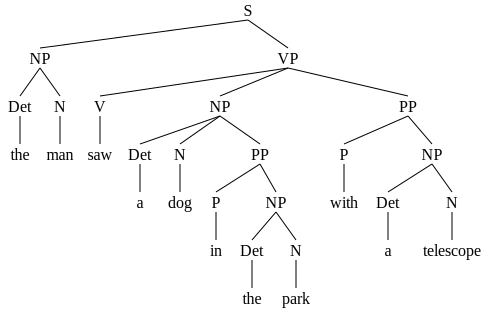

In [8]:
import svgling
#The last tree looks like this - 
tree

In [9]:
nltk.app.rdparser()
# once the recursive descent parser application opens, 
# you can edit the 'Text' and 'Grammar' according to your requirements

---

# 2. Bottom-Up Parsing

"""
- Starts with the input sentence and works upwards to the root of the parse tree (start symbol).
- Combines terminals and non-terminals until the root is reached.

### Key Features:
1. Begins with the input sentence's words as the leaves of the tree.
2. Combines components step-by-step using grammar rules.
3. Ends when the start symbol is derived.

### Advantages:
- Guarantees that the parse corresponds to the input sentence.
- Avoids generating invalid parse trees.
- Robustness: Handles left recursion and ambiguous grammars naturally.

### Disadvantages:
- May require more computational resources.
- Can be complex to implement for ambiguous grammars.

### Example:
For the same grammar and input: "the cat saw a dog"

1. Start with tokens: ['the', 'cat', 'saw', 'a', 'dog']
2. Combine 'the' + 'cat' -> NP
3. Combine 'saw' + 'a' + 'dog' -> VP
4. Combine NP + VP -> S
"""

# Comparison Table


| Feature               | Top-Down Parsing         | Bottom-Up Parsing         |
|-----------------------|--------------------------|---------------------------|
| Start Point           | Root (start symbol)      | Leaves (input sentence)   |
| Approach              | Expand rules downward    | Combine components upward |
| Efficiency            | Faster for small grammars| Better for complex grammars           |
| Invalid Parse Trees   | May generate invalid     | Avoids invalid parses     |
| Implementation        | Simpler                  | More complex              |
| Left Recursion        | Requires grammar modification         | Handles naturally                 |


---

In [10]:
import nltk 

grammar=nltk.CFG.fromstring("""
S -> NP VP
VP -> V NP
V -> "saw" | "ate"
NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
Det -> "a" | "an" | " the" | "my"
N -> "dog"| "cat" | "cookie" | "park" 
PP -> P NP 
P -> "in" | "on" 
""")

In [11]:
str = "Mary saw a cat"

# ShiftReduce Parser is a bottom up parser
from nltk.parse import ShiftReduceParser
srp = ShiftReduceParser(grammar)

for t in srp.parse(str.split()):
    print(t)

# Shift Reduce parser tries to aggregate the string to the start symbol, since it's a bottom-up parser
# It is not able to find the parse tree even if it exists 

(S (NP Mary) (VP (V saw) (NP (Det a) (N cat))))


In [12]:
nltk.app.srparser()
# once the shift reduce parser application opens, 
# you can edit the 'Text' and 'Grammar' according to your requirements